In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Dataset & Preprocessing

In [ ]:
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing()
descr = housing_data['DESCR']
feature_names = housing_data['feature_names']
data = housing_data['data']
target = housing_data['target']
df1 = pd.DataFrame(data=data)
df1.rename(columns={0: feature_names[0], 1: feature_names[1], 2: feature_names[2], 3: feature_names[3],
 4: feature_names[4], 5: feature_names[5], 6: feature_names[6], 7: feature_names[7]}, inplace=True)
df2 = pd.DataFrame(data=target)
df2.rename(columns={0: 'Target'}, inplace=True)
housing = pd.concat([df1, df2], axis=1)
print(housing.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')


In [ ]:
print(descr)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
x = df1
y = df2

In [ ]:
scaler = StandardScaler();
x = scaler.fit_transform(x)
x.shape

(20640, 8)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

# Sequential API Model

In [ ]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Flatten(input_shape=[8], name="inputLayer"))
model1.add(tf.keras.layers.Dense(30,activation="relu", name="hiddenLayer1"))
#model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Dense(1, activation="linear", name="outputLayer"))

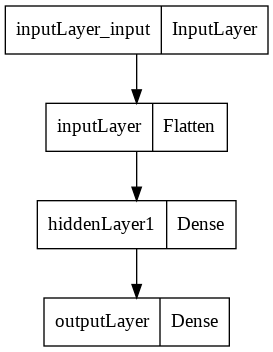

In [ ]:
keras.utils.plot_model(model1)

In [ ]:
model1.compile(optimizer="adam",
          loss="mse",
          metrics=[tf.keras.metrics.RootMeanSquaredError()])
          #metrics="rmse")

history1 = model1.fit(x_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
407/407 [==============================] - 2s 3ms/step - loss: 1.4855 - root_mean_squared_error: 1.2188 - val_loss: 0.7003 - val_root_mean_squared_error: 0.8368
Epoch 2/20
407/407 [==============================] - 2s 4ms/step - loss: 0.5865 - root_mean_squared_error: 0.7658 - val_loss: 0.4887 - val_root_mean_squared_error: 0.6991
Epoch 3/20
407/407 [==============================] - 2s 6ms/step - loss: 0.4668 - root_mean_squared_error: 0.6832 - val_loss: 0.4155 - val_root_mean_squared_error: 0.6446
Epoch 4/20
407/407 [==============================] - 2s 6ms/step - loss: 0.4205 - root_mean_squared_error: 0.6484 - val_loss: 0.3915 - val_root_mean_squared_error: 0.6257
Epoch 5/20
407/407 [==============================] - 3s 6ms/step - loss: 0.4003 - root_mean_squared_error: 0.6327 - val_loss: 0.3828 - val_root_mean_squared_error: 0.6187
Epoch 6/20
407/407 [==============================] - 2s 6ms/step - loss: 0.3903 - root_mean_squared_error: 0.6247 - val_loss: 0.3770 - val_

In [ ]:
test_loss1, test_acc1 = model1.evaluate(x_test, y_test)

194/194 [==============================] - 0s 2ms/step - loss: 0.3498 - root_mean_squared_error: 0.5915


RMSE score below 0.5 is considered to be good. Here, as the RMSE is only slightly above 0.5, the model has decent accuracy.

# Functional API Model

In [ ]:
from tensorflow.keras import layers

inputA = keras.Input(shape=(5,), name="InputA")
inputB = keras.Input(shape=(6,), name="InputB")

l = layers.Dense(30, activation="relu", name="Hidden1")(inputB)
#l = layers.BatchNormalization()(l)
l = layers.Dense(30, activation="relu", name="Hidden2")(l)
#l = layers.BatchNormalization()(l)

l = layers.concatenate([l, inputA])

output = layers.Dense(1, activation='linear', name="Output")(l)

model2 = keras.Model(
    inputs=[inputA, inputB],
    outputs=output,
)

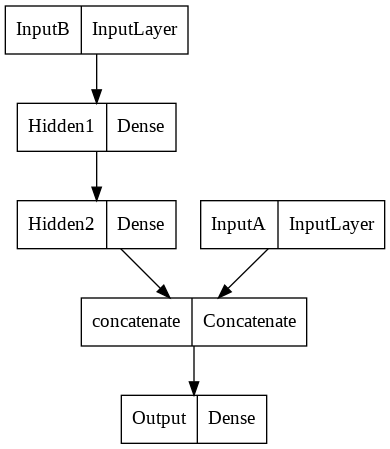

In [ ]:
keras.utils.plot_model(model2)

In [ ]:
model2.compile(optimizer="adam",
          loss="mse",
          metrics=[tf.keras.metrics.RootMeanSquaredError()])

history2 = model2.fit(
    {"InputA": x_train[:,0:5], "InputB": x_train[:,2:8]},
    y_train, epochs=20, validation_split=0.1)

Epoch 1/20
407/407 [==============================] - 2s 3ms/step - loss: 1.6741 - root_mean_squared_error: 1.2939 - val_loss: 0.6621 - val_root_mean_squared_error: 0.8137
Epoch 2/20
407/407 [==============================] - 1s 3ms/step - loss: 0.5162 - root_mean_squared_error: 0.7184 - val_loss: 0.4395 - val_root_mean_squared_error: 0.6629
Epoch 3/20
407/407 [==============================] - 1s 3ms/step - loss: 0.4274 - root_mean_squared_error: 0.6537 - val_loss: 0.3922 - val_root_mean_squared_error: 0.6263
Epoch 4/20
407/407 [==============================] - 1s 3ms/step - loss: 0.4007 - root_mean_squared_error: 0.6330 - val_loss: 0.3753 - val_root_mean_squared_error: 0.6126
Epoch 5/20
407/407 [==============================] - 1s 3ms/step - loss: 0.3846 - root_mean_squared_error: 0.6202 - val_loss: 0.3626 - val_root_mean_squared_error: 0.6021
Epoch 6/20
407/407 [==============================] - 1s 3ms/step - loss: 0.3747 - root_mean_squared_error: 0.6121 - val_loss: 0.3575 - val_

In [ ]:
test_loss2, test_acc2 = model2.evaluate({"InputA": x_test[:,0:5], "InputB": x_test[:,2:8]}, y_test)

194/194 [==============================] - 0s 2ms/step - loss: 0.3390 - root_mean_squared_error: 0.5822


RMSE score below 0.5 is considered to be good. Here, as the RMSE is only slightly above 0.5, the model has decent accuracy.

# Performance Comparison

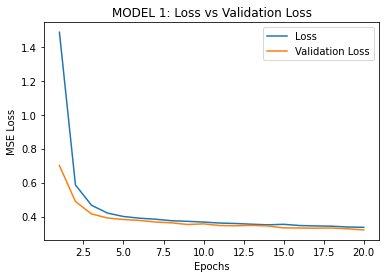

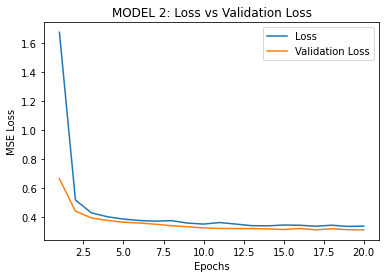

In [ ]:
acc1 = history1.history['root_mean_squared_error']
val_acc1 = history1.history['val_root_mean_squared_error']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

ep1 = np.arange(1,21)

plt.title("MODEL 1: Loss vs Validation Loss")
sns.lineplot(x=ep1,y = loss1)
sns.lineplot(x=ep1,y = val_loss1)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend(["Loss", "Validation Loss"])
plt.show()

acc2 = history2.history['root_mean_squared_error']
val_acc2 = history2.history['val_root_mean_squared_error']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

ep2 = np.arange(1,21)

plt.title("MODEL 2: Loss vs Validation Loss")
sns.lineplot(x=ep2,y = loss2)
sns.lineplot(x=ep2,y = val_loss2)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend(["Loss", "Validation Loss"])
plt.show()

**Both models perform very similarly as both have test rmse score around 0.57 - 0.59.**
<br>
The graph for MSE Loss for 20 epochs is also very similar for both models